# PCA (Core)

## Reducción de Dimensionalidad

### Descripción:

En esta actividad, aplicarás el **Análisis de Componentes Principales (PCA)** para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset **«Wine Quality»** disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: [Wine Quality Dataset](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

### Objetivo:

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

### Instrucciones:

#### 1. Carga de datos:
- Descarga y carga el dataset «Wine Quality» de Kaggle.
- Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
- El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

#### 2. Exploración y preprocesamiento de datos:
- Realiza una exploración inicial del dataset.
  - Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
- Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

#### 3. Aplicación de PCA:
- Implementa PCA en el dataset para reducir la dimensionalidad.
- Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
- Visualiza el gráfico de **«explained variance»** para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

#### 4. Interpretación de los componentes principales:
- Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
- Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

#### 5. Visualización y comparación:
- Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
- Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

### Análisis de Resultados:

- Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad.
- Discute la importancia de las variables que más contribuyen a los primeros componentes.
- Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.

### Conclusión:

Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.


In [22]:
#Importar Librerias Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
# Paso 1: Carga de datos
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(data_url, sep=";")

In [24]:
# Exploración inicial del dataset
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
# Paso 2: Exploración y preprocesamiento de datos
# Revisión de valores nulos
print("\nValores nulos por columna:")

qsna = df.shape[0] - df.isnull().sum(axis=0)
qna = df.isnull().sum(axis=0)
ppna = np.round(100 * (df.isnull().sum(axis=0) / df.shape[0]), 2)
aux = {'datos sin NAs en q': qsna, 'Na en q': qna, 'Na en %': ppna}
na = pd.DataFrame(data=aux)
na.sort_values(by='Na en %', ascending=False)



Valores nulos por columna:


,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


In [27]:
# Normalización de las variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


Número de componentes principales para capturar al menos el 90% de la variabilidad: 8


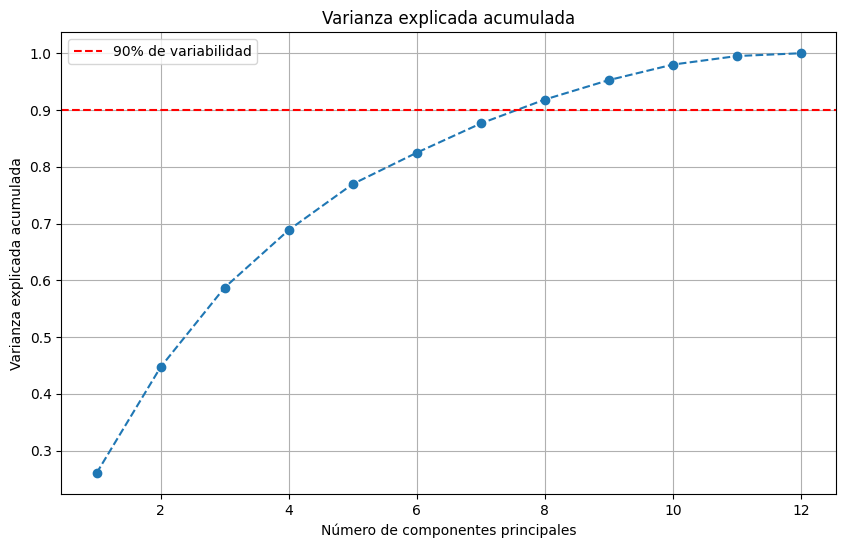

In [28]:
# Paso 3: Aplicación de PCA
# Aplicar PCA para obtener componentes principales
pca = PCA()
pca.fit(data_scaled)

# Variabilidad explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número de componentes para capturar al menos el 90% de la variabilidad
n_components = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"\nNúmero de componentes principales para capturar al menos el 90% de la variabilidad: {n_components}")

# Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% de variabilidad")
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.legend()
plt.show()

# Reducir dimensionalidad con los componentes seleccionados
pca_reduced = PCA(n_components=n_components)
data_pca = pca_reduced.fit_transform(data_scaled)

In [29]:
# Paso 4: Interpretación de los componentes principales
components = pd.DataFrame(pca_reduced.components_, columns=data.columns)
print("\nComponentes principales (coeficientes):")
print(components)


Componentes principales (coeficientes):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.487883         -0.265129     0.473335        0.139154   0.197427   
1       0.004173         -0.338968     0.137358       -0.167736  -0.189788   
2      -0.164829         -0.227089     0.100229        0.243620  -0.026608   
3      -0.231098          0.041858    -0.056736       -0.383038   0.654778   
4      -0.078779          0.299379    -0.120149        0.709363   0.266237   
5      -0.055531         -0.297287    -0.136633       -0.109311  -0.337337   
6       0.307215          0.626234    -0.244149       -0.283854  -0.230547   
7      -0.200529         -0.146126    -0.296333        0.170626   0.186923   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.045881              0.004067  0.370301 -0.432721   0.254535   
1            -0.259483             -0.363971 -0.330781  0.065440   0.109334   
2             0.616

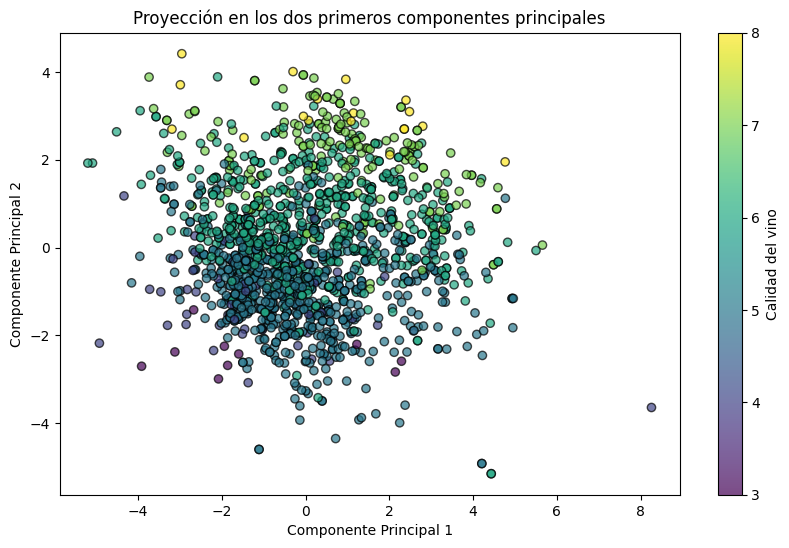


Con 8 componentes principales, se captura el 91.84% de la variabilidad del dataset.


In [30]:
# Paso 5: Visualización y comparación
labels = df['quality']
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.title('Proyección en los dos primeros componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Calidad del vino')
plt.show()

# Análisis final
print(f"\nCon {n_components} componentes principales, se captura el {explained_variance_ratio[n_components-1]*100:.2f}% de la variabilidad del dataset.")